In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy.misc import imread, imresize
from keras.preprocessing.image import img_to_array, load_img

import cv2

# Visualizations will be shown inline
%matplotlib inline

Using TensorFlow backend.


In [2]:
data_frame = pd.read_csv("data/driving_log.csv", usecols=[0,1,2,3])

data_frame.describe(include="all")

,center,left,right,steering
count,8036,8036,8036,8036.000000
unique,8036,8036,8036,NaN
top,IMG/center_2016_12_01_13_43_04_692.jpg,IMG/left_2016_12_01_13_39_53_314.jpg,IMG/right_2016_12_01_13_38_06_032.jpg,NaN
freq,1,1,1,NaN
mean,NaN,NaN,NaN,0.004070
std,NaN,NaN,NaN,0.128840
min,NaN,NaN,NaN,-0.942695
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11adac5c0>]], dtype=object)

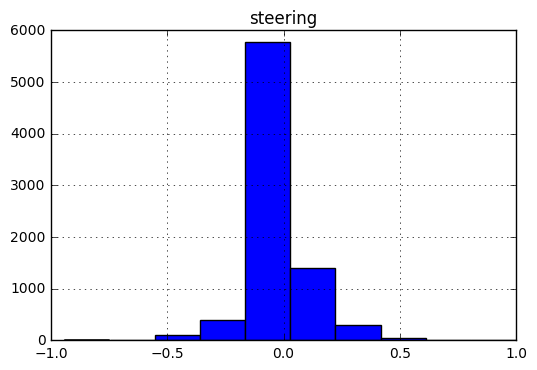

In [3]:
data_frame.hist(column="steering")

## Plot some left, center and right images

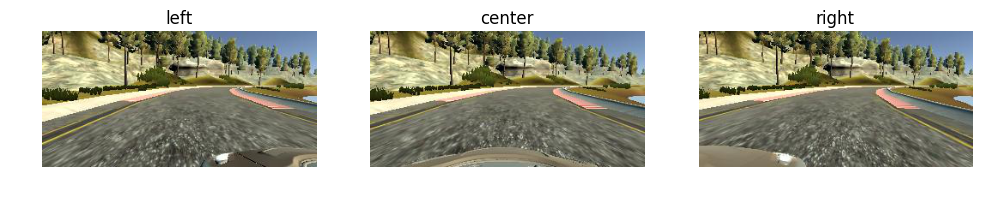

In [4]:
from keras.preprocessing.image import img_to_array, load_img

plt.rcParams['figure.figsize'] = (12, 6)

i = 0
for camera in ["left", "center", "right"]:
    image = load_img("data/"+data_frame.iloc[1090][camera].strip())
    image = img_to_array(image).astype(np.uint8)
    plt.subplot(1, 3, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(camera)
    i += 1

## Plot the same images but crop to remove the sky and car bonnet

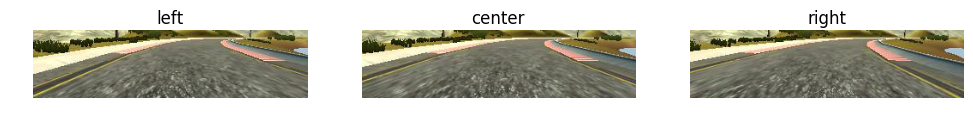

In [5]:
# With cropping
plt.rcParams['figure.figsize'] = (12, 6)

i = 0
for camera in ["left", "center", "right"]:
    image = load_img("data/"+data_frame.iloc[1090][camera].strip())
    image = img_to_array(image).astype(np.uint8)
    image = image[55:135, :, :]
    plt.subplot(1, 3, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(camera)
    i += 1

## Same images but resized

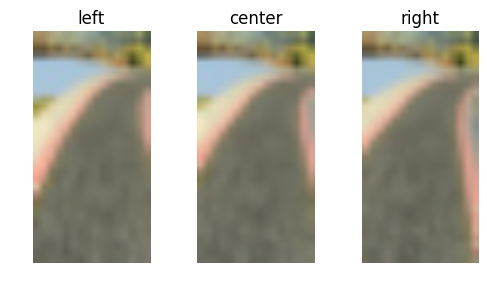

In [6]:
# With cropping then resizing
#plt.figure()
plt.rcParams['figure.figsize'] = (6, 3)

i = 0
for camera in ["left", "center", "right"]:
    image = load_img("data/"+data_frame.iloc[7100][camera].strip())
    image = img_to_array(image).astype(np.uint8)
    image = image[55:135, :, :]
    image = imresize(image, (32, 16, 3))
    plt.subplot(1, 3, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(camera)
    i += 1
    

## Converted to HSV colour space and showing only the S channel

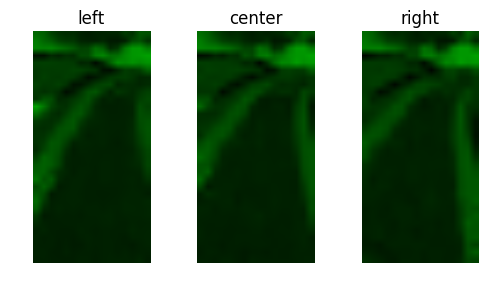

In [7]:
# With cropping then resizing then HSV
i = 0
for camera in ["left", "center", "right"]:
    image = load_img("data/"+data_frame.iloc[7100][camera].strip())
    image = img_to_array(image).astype(np.uint8)
    image = image[55:135, :, :]
    image = imresize(image, (32, 16, 3))
    hsv = cv2.cvtColor(image.astype("uint8"), cv2.COLOR_RGB2HSV)
    hsv[:, :, 0] = hsv[:, :, 0] * 0
    hsv[:, :, 2] = hsv[:, :, 2] * 0
    plt.subplot(1, 3, i+1)
    plt.imshow(hsv)
    plt.axis('off')
    plt.title(camera)
    i += 1

## Converted to YUV colour space and showing only the V channel

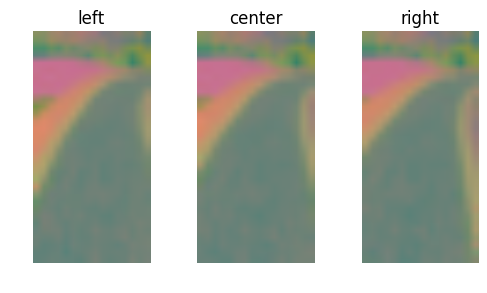

In [8]:
# With cropping then resizing then YUV
i = 0
for camera in ["left", "center", "right"]:
    image = load_img("data/"+data_frame.iloc[7100][camera].strip())
    image = img_to_array(image).astype(np.uint8)
    image = image[55:135, :, :]
    image = imresize(image, (32, 16, 3))
    yuv = cv2.cvtColor(image.astype("uint8"), cv2.COLOR_RGB2YUV)
    hsv[:, :, 0] = hsv[:, :, 0] * 0
    hsv[:, :, 1] = hsv[:, :, 1] * 0
    plt.subplot(1, 3, i+1)
    plt.imshow(yuv)
    plt.axis('off')
    plt.title(camera)
    i += 1

## Show some examples from Track 2 with cropping, HSV (only S channel)

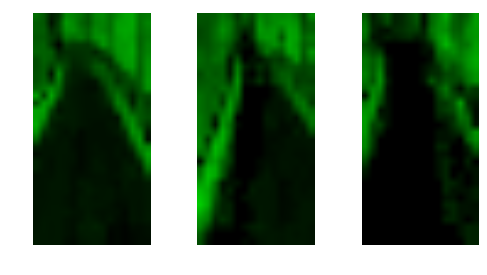

In [9]:
#plt.figure()
plt.rcParams['figure.figsize'] = (6, 3)

i = 0
for track2_image_file in ["data/track_2_1.jpg", "data/track_2_2.jpg", "data/track_2_3.jpg"]:
    track2_image = load_img(track2_image_file)
    track2_image = img_to_array(track2_image).astype(np.uint8)
    track2_image = track2_image[55:135, :, :]
    track2_image = imresize(track2_image, (32, 16, 3))
    
    yuv = cv2.cvtColor(track2_image.astype("uint8"), cv2.COLOR_RGB2HSV)
    yuv[:, :, 0] = yuv[:, :, 0] * 0
    yuv[:, :, 2] = yuv[:, :, 2] * 0
    
    plt.subplot(1, 3, i+1)
    plt.imshow(yuv)
    plt.axis('off')
    
    i += 1

The S channel in the HSV colour-space looks promising as the result is very similar for both track 1 and track 2 which has very bad shadowing...


## Remove the data frame header row and train/val split

In [10]:
# Remove header
data_frame = data_frame.ix[1:]

# shuffle the data (frac=1 meand 100% of the data)
data_frame = data_frame.sample(frac=1).reset_index(drop=True)

In [11]:
# 80-20 training validation split
training_split = 0.8

num_rows_training = int(data_frame.shape[0]*training_split)
print(num_rows_training)

training_data = data_frame.loc[0:num_rows_training-1]
validation_data = data_frame.loc[num_rows_training:]

# release the main data_frame from memory
data_frame = None

6428


## Routines for reading and processing images

In [12]:
def read_images(img_dataframe):
    #from IPython.core.debugger import Tracer
    #Tracer()() #this one triggers the debugger
    
    imgs = np.empty([len(img_dataframe), 160, 320, 3])
    angles = np.empty([len(img_dataframe)])

    j = 0
    for i, row in img_dataframe.iterrows():
        # Randomly pick left, center, right camera image and adjust steering angle 
        # as necessary
        camera = np.random.choice(["center", "left", "right"])
        imgs[j] = imread("data/" + row[camera].strip())
        steering = row["steering"]
        if camera == "left":
            steering += 0.25
        elif camera == "right":
            steering -= 0.25
            
        angles[j] = steering
        j += 1
        
    #for i, path in enumerate(img_paths):
    #    print("data/" + path)
    #    imgs[i] = imread("data/" + path)

    return imgs, angles

In [13]:
def resize(imgs, shape=(32, 16, 3)):
    """
    Resize images to shape.
    """
    height, width, channels = shape
    imgs_resized = np.empty([len(imgs), height, width, channels])
    for i, img in enumerate(imgs):
        imgs_resized[i] = imresize(img, shape)
        #imgs_resized[i] = cv2.resize(img, (16, 32))

    return imgs_resized

In [14]:
def normalize(imgs):
    """
    Normalize images between [-1, 1].
    """
    #return imgs / (255.0 / 2) - 1
    return imgs / 255.0 - 0.5

In [15]:
def augment_brightness(images):
    """
    :param image: Input image
    :return: output image with reduced brightness
    """

    new_imgs = np.empty_like(images)

    for i, image in enumerate(images):
        #rgb = toimage(image)

        # convert to HSV so that its easy to adjust brightness
        hsv = cv2.cvtColor(image.astype("uint8"), cv2.COLOR_RGB2HSV)

        # randomly generate the brightness reduction factor
        # Add a constant so that it prevents the image from being completely dark
        random_bright = .25+np.random.uniform()

        # Apply the brightness reduction to the V channel
        hsv[:,:,2] = hsv[:,:,2]*random_bright

        # Clip the image so that no pixel has value greater than 255
        hsv[:, :, 2] = np.clip(hsv[:, :, 2], a_min=0, a_max=255)
        
        # convert to RBG again
        new_imgs[i] = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    return new_imgs

In [16]:
def preprocess(imgs):
    #imgs_processed = resize(imgs)
    #imgs_processed = rgb2gray(imgs_processed)
    imgs_processed = normalize(imgs)

    return imgs_processed

## Generator function (not yielding here as we want to just show the images) - displays 3 images from the batch and then the same images augmented

In [17]:
def gen_batches(data_frame, batch_size):
    """
    Generates random batches of the input data.

    :param imgs: The input images.
    :param angles: The steering angles associated with each image.
    :param batch_size: The size of each minibatch.

    :yield: A tuple (images, angles), where both images and angles have batch_size elements.
    """

    #while True:
    df_batch = data_frame.sample(n=batch_size)
    
    images_raw, angles_raw = read_images(df_batch)
    
    plt.figure()
    
    # Show a sample of 3 images
    for i in range(3):
        plt.subplot(2, 3, i+1)
        plt.imshow(images_raw[i].astype("uint8"))
        plt.axis("off")
        plt.title("%.8f" % angles_raw[i])
    
    # Augment data by altering brightness of images
    #plt.figure()
    augmented_imgs = augment_brightness(images_raw)
    for i in range(3):
        plt.subplot(2, 3, i+4)
        plt.imshow(augmented_imgs[i].astype("uint8"))
        plt.axis('off')
        plt.title("%.8f" % angles_raw[i])
        
        
    #batch_imgs, batch_angles = augment(preprocess(batch_imgs_raw), angles_raw)
    #    batch_imgs, batch_angles = augment(batch_imgs_raw, angles_raw)
    #    batch_imgs = preprocess(batch_imgs)

    #    yield batch_imgs, batch_angles

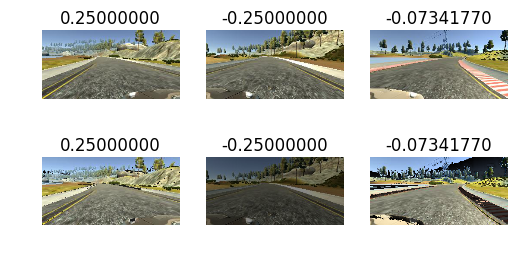

In [20]:
gen_batches(training_data, 3)